In [28]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.layers import Dense, MaxPool2D, Flatten, Conv2D, Dropout
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [29]:
import warnings
warnings.filterwarnings('ignore')

In [30]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

In [31]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette("Paired")

plt.rcParams['figure.dpi'] = 120


In [34]:
train_y = train['label']

train_x = train.drop(labels=["label"], axis=1)

train_y.head()


0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

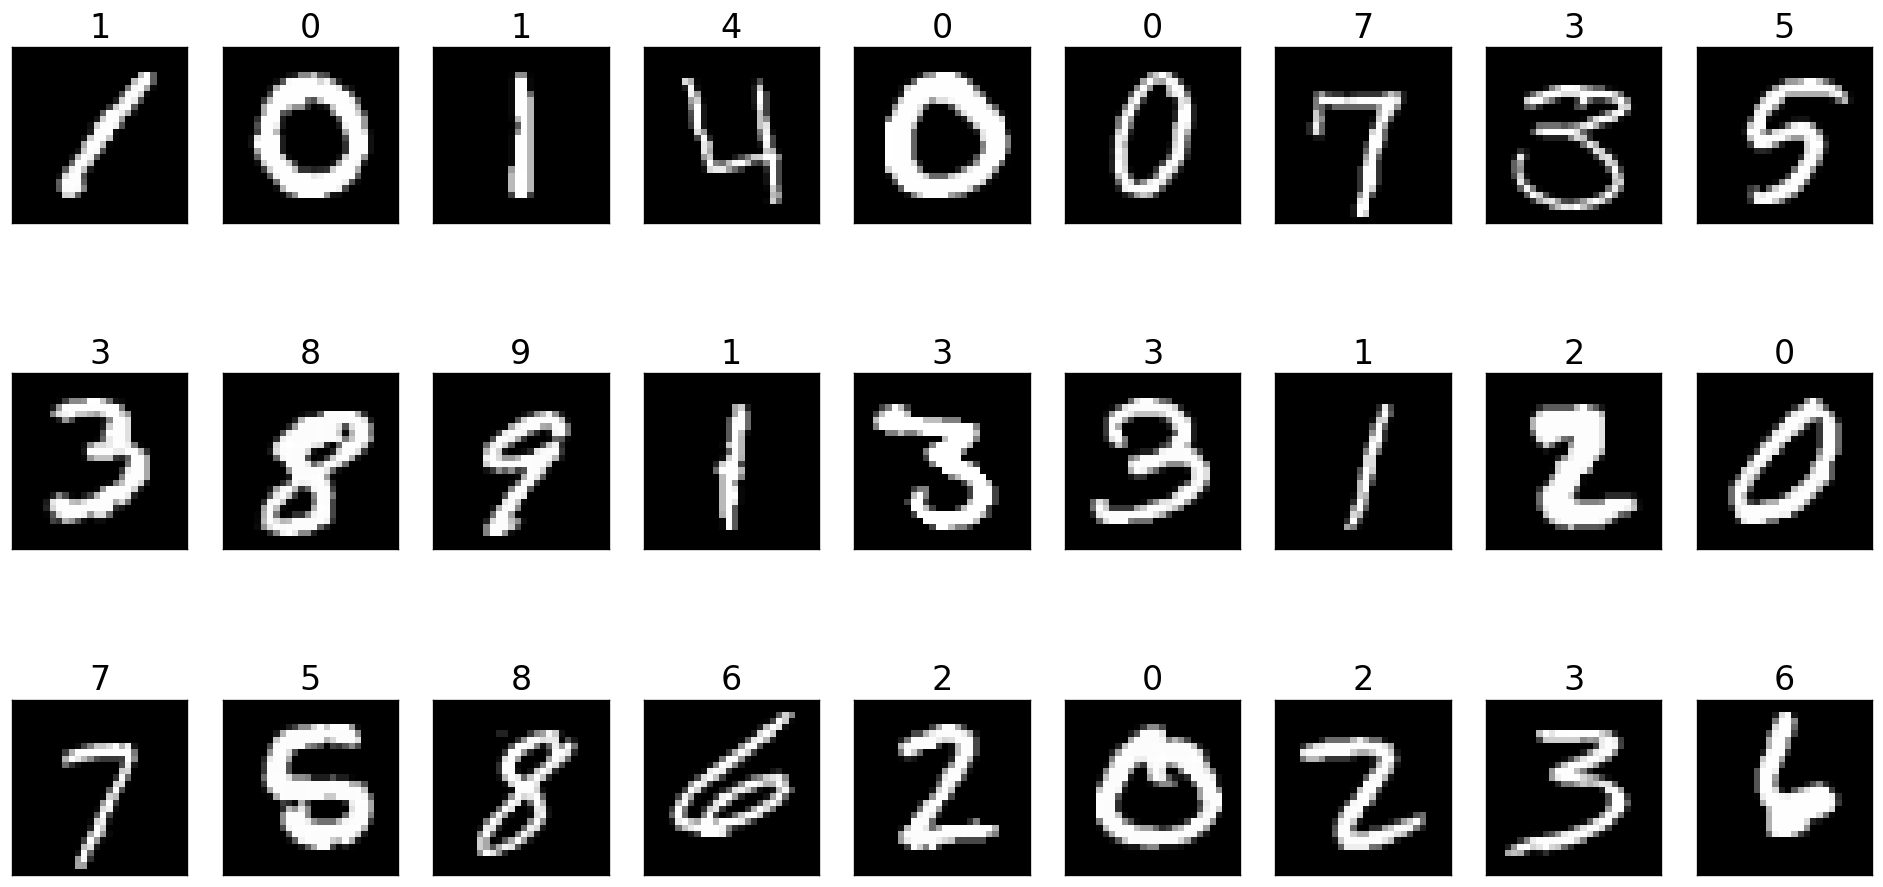

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))

for i in range(27):
    plt.subplot(3, 9, i + 1)
    
    plt.xticks([])
    plt.yticks([])
    
    plt.grid(False)
    
    plt.imshow(train_x.iloc[i].values.reshape((28, 28)), cmap='gray')
    
    plt.title(train_y.iloc[i], size=20)

plt.show()


In [36]:
a = dict(train['label'].value_counts())
a = dict(sorted(a.items()))

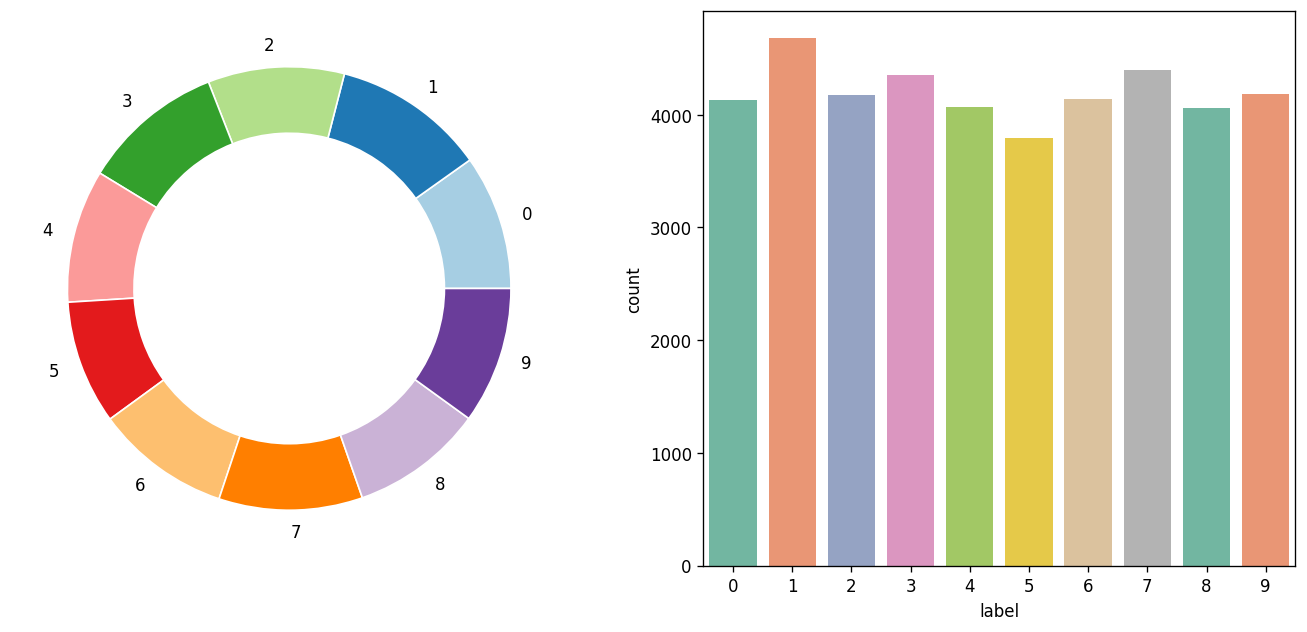

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

background_color = '#fff'
ax1.set_facecolor(background_color)
ax2.set_facecolor(background_color)

ax1.pie(a.values(), 
        wedgeprops=dict(width=0.3, edgecolor='w'), 
        labels=a.keys(), 
        radius=1)

sns.countplot(ax=ax2, x=train['label'], palette='Set2')

plt.show()


In [38]:
train_x = train_x/255.0
test = test/255.0
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 784)
Test Shape     :  (42000,)


In [39]:
train_x = train_x.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("X_train Shape  : ",train_x.shape)
print("Test Shape     : ",train_y.shape)

X_train Shape  :  (42000, 28, 28, 1)
Test Shape     :  (42000,)


In [40]:
x_train,x_val,y_train,y_val = train_test_split(train_x,train_y,test_size = 0.2,random_state = 12345)


In [41]:
x_train.shape,x_val.shape,y_train.shape,y_val.shape


((33600, 28, 28, 1), (8400, 28, 28, 1), (33600,), (8400,))

In [42]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3,3),padding = 'Same', activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [43]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),metrics =['accuracy'])


In [44]:
history = model.fit(
    x_train,
    y_train,
    batch_size=1000,
    epochs=200,
    verbose=1,
    validation_data=(x_val,y_val),
)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4157 - loss: 1.7792 - val_accuracy: 0.8792 - val_loss: 0.4360
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8404 - loss: 0.5041 - val_accuracy: 0.9333 - val_loss: 0.2379
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9002 - loss: 0.3168 - val_accuracy: 0.9515 - val_loss: 0.1643
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9237 - loss: 0.2442 - val_accuracy: 0.9614 - val_loss: 0.1278
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9354 - loss: 0.2033 - val_accuracy: 0.9643 - val_loss: 0.1123
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9448 - loss: 0.1776 - val_accuracy: 0.9698 - val_loss: 0.0947
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9526 - loss: 0.1487 - val_accuracy: 0.9732 - val_loss: 0.0894
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9555 - loss: 0.1397 - val_accuracy: 0.

In [45]:
print('Loss     : {} \nAccuracy : {}'.format(history.history['loss'][-1],history.history['accuracy'][-1]))


Loss     : 0.007729103323072195 
Accuracy : 0.9973809719085693


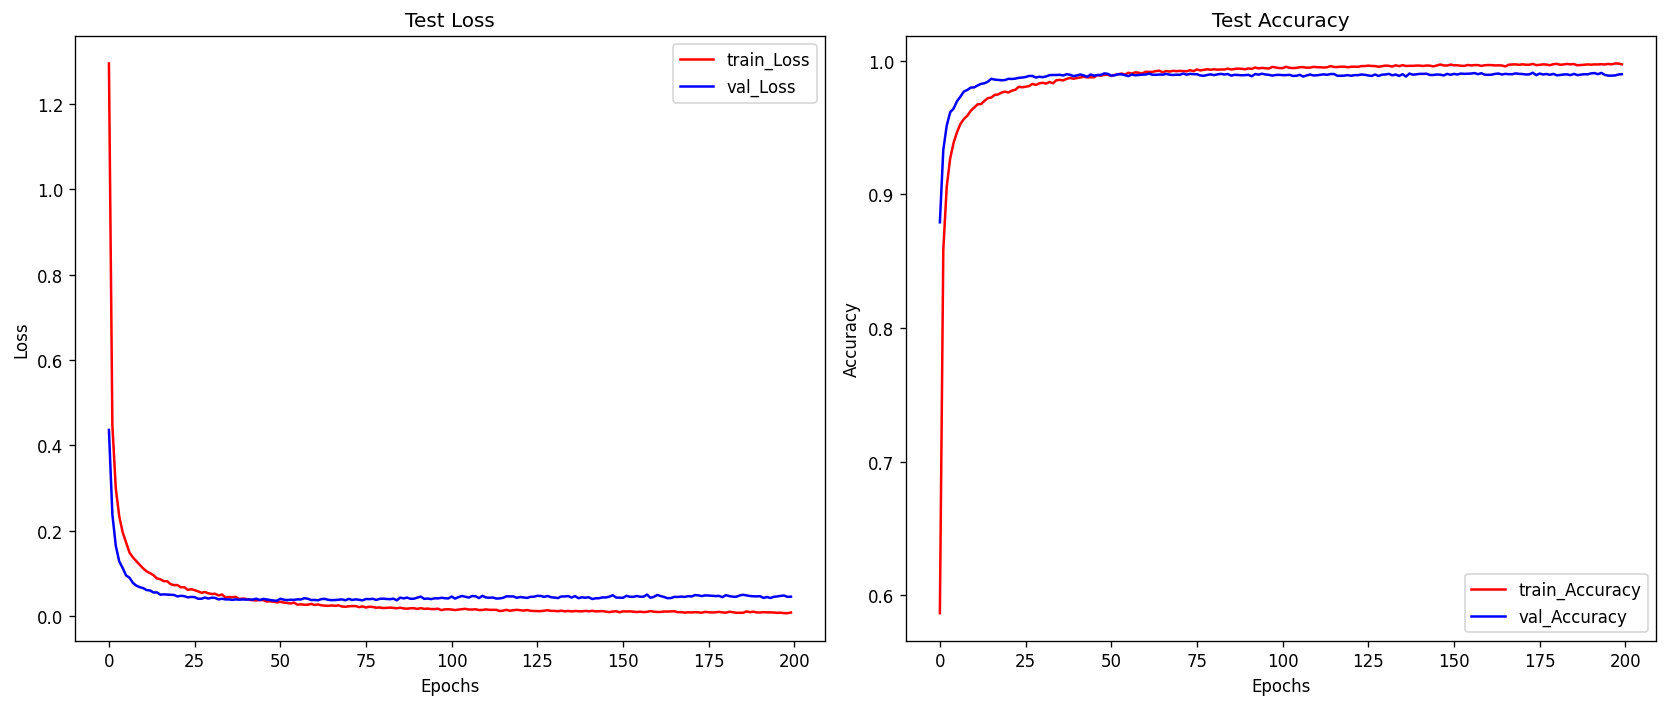

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,6))

ax1.plot(history.history['loss'], color='r', label="train_Loss")
ax1.plot(history.history['val_loss'], color='b', label="val_Loss")
ax1.legend()
ax1.set_title("Test Loss")
ax1.set_ylabel("Loss")
ax1.set_xlabel("Epochs")

ax2.plot(history.history['accuracy'], color='r', label="train_Accuracy")
ax2.plot(history.history['val_accuracy'], color='b', label="val_Accuracy")
ax2.legend()
ax2.set_title("Test Accuracy")
ax2.set_ylabel("Accuracy")
ax2.set_xlabel("Epochs")
fig.tight_layout()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step


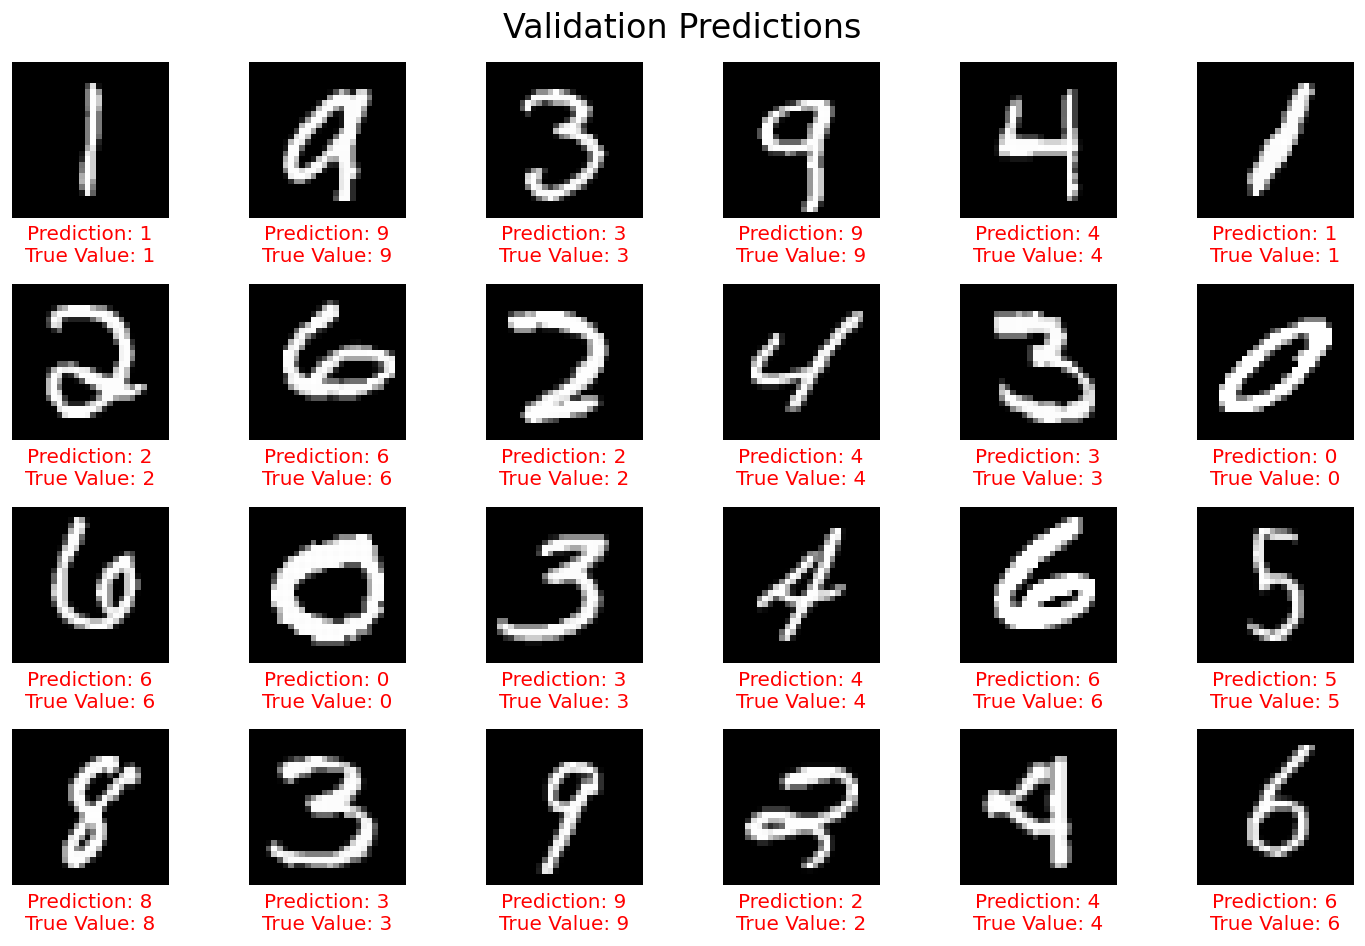

In [47]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.array(y_val)
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Validation Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = x_val[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}\nTrue Value: {}".format(Y_pred_classes[i], Y_true[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

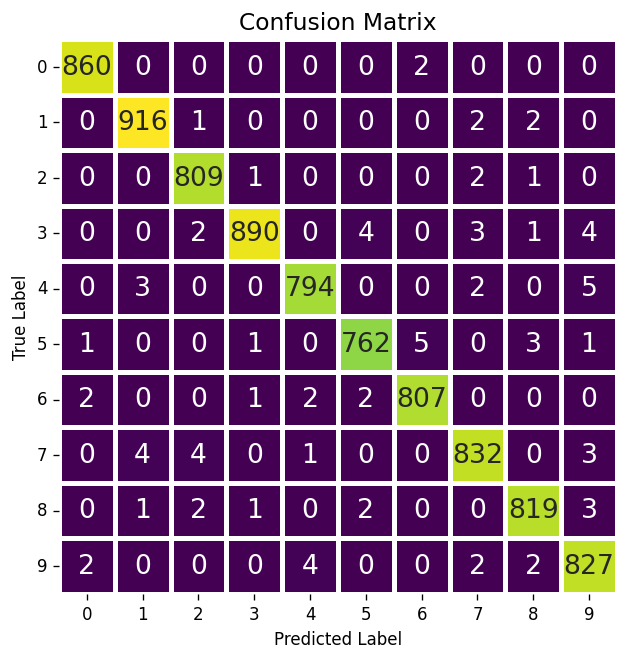

In [48]:
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(confusion_mtx, annot=True,
            linewidths=3,cmap="viridis",
            fmt= '.0f',ax=ax,
            cbar = False,
           annot_kws={"size": 16})
plt.yticks(rotation = 0)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 14)
plt.show()

875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step


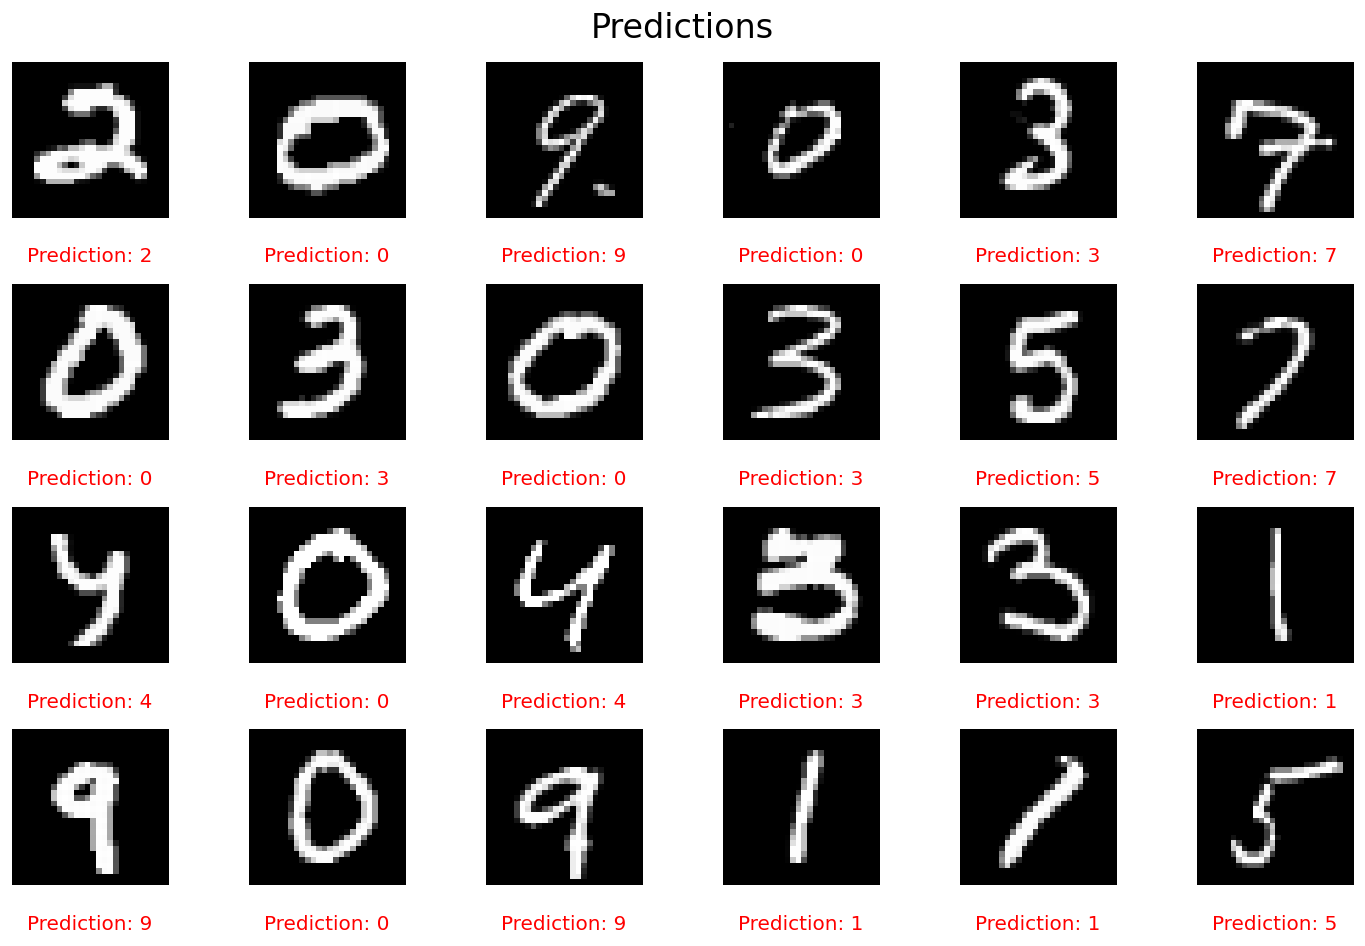

In [49]:
Y_pred = model.predict(test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
rows = 4
cols = 6
f = plt.figure(figsize=(2*cols,2*rows))
f.suptitle("Predictions", fontsize=20)
for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1)
    img = test[i]
    img = img.reshape((28,28))
    plt.imshow(img,
               cmap='gray')
    plt.axis("off")
    plt.title("Prediction: {}".format(Y_pred_classes[i]),
              y=-0.35,color="red")
f.tight_layout()
    
f.show()

263/263 ━━━━━━━━━━━━━━━━━━━━ 0s 864us/step


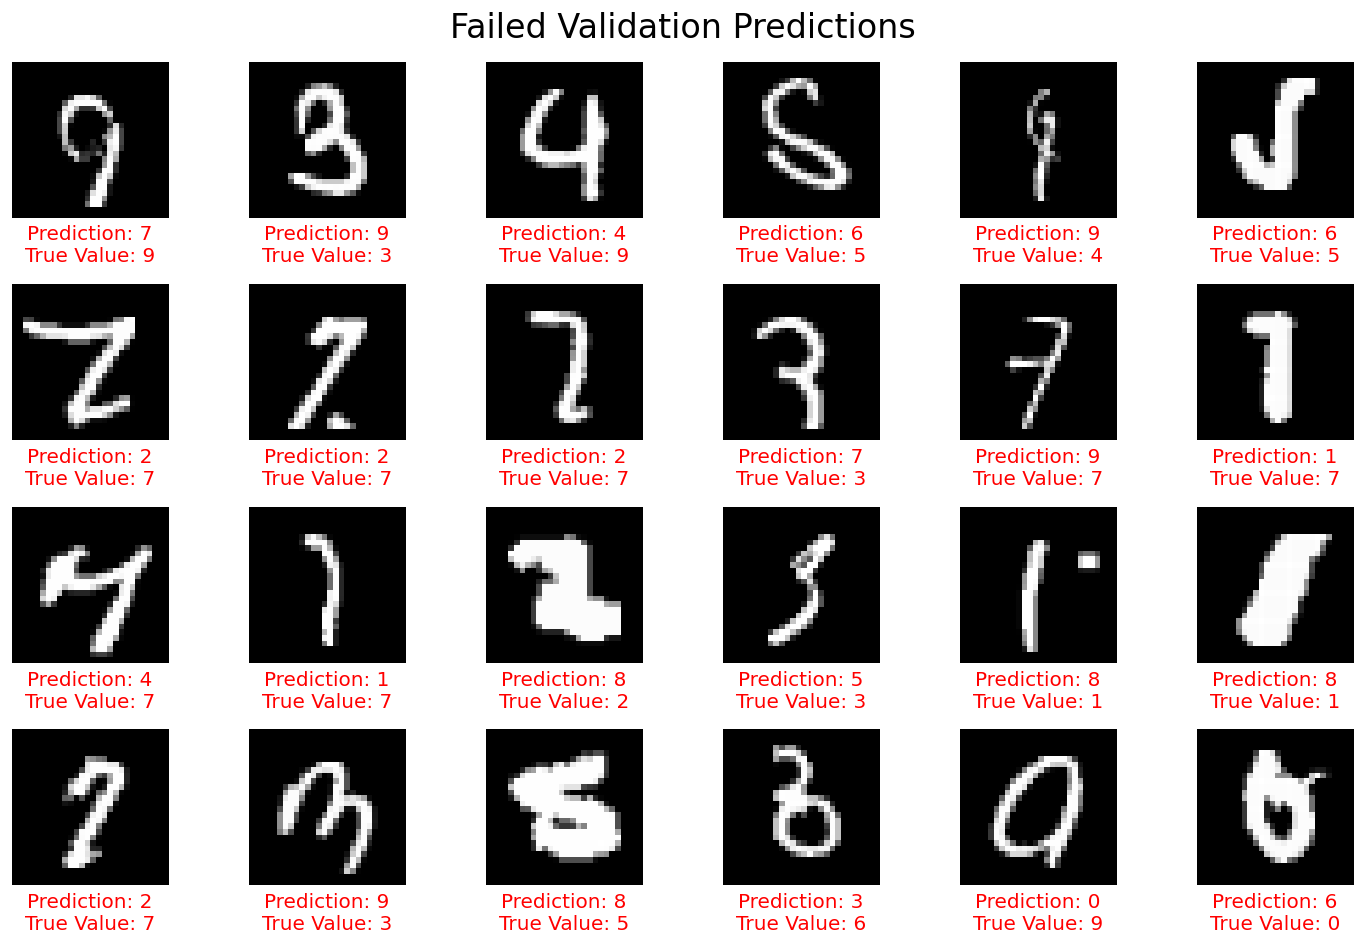

In [ ]:
Y_pred = model.predict(x_val)
Y_pred_classes = np.argmax(Y_pred, axis=1)
Y_true = np.array(y_val)

errors_index = [i for i, (pred, actual) in enumerate(zip(Y_pred_classes, Y_true)) if pred != actual]

rows = 4
cols = 6
f = plt.figure(figsize=(2*cols, 2*rows))
f.suptitle("Failed Validation Predictions", fontsize=20)
n_errors = rows * cols

for i in range(n_errors):
    if i < len(errors_index):
        error_index = errors_index[i]
        f.add_subplot(rows, cols, i+1)
        img = x_val[error_index]
        img = img.reshape((28,28))
        plt.imshow(img, cmap='gray')
        plt.axis("off")
        plt.title(f"Prediction: {Y_pred_classes[error_index]}\nTrue Value: {Y_true[error_index]}",
                  y=-0.35, color="red")
f.tight_layout()
f.show()
